In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = np.array(df.loc[:, df.columns != 'output'])
y = np.array(df['output'])

In [5]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (303, 13)
y shape: (303,)


In [6]:
# split to train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=159)

In [7]:
# normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Neral Network

In [8]:
class NNFromScratch:
    def __init__(self, learning_rate, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train_scaled.shape[1])
        self.b = np.random.randn()
        self.learning_rate = learning_rate
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.train_loss = []
        self.test_loss = []

    # activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    # derivative 
    def dactivation(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, X):
        hidden_layer = np.dot(X, self.w) + self.b
        activation = self.sigmoid(hidden_layer)
        return activation

    def backward(self, X, y_true):
        # 1) forward pass để lấy y_pred
        hidden_1 = X.dot(self.w) + self.b
        y_pred = self.forward(X)

        # 2) gradient của loss w.r.t y_pred
        dLoss_ypred = 2 * (y_pred - y_true)           # shape: (batch_size,)

        # 3) gradient y_pred => hidden_1
        dypred_hidden = self.dactivation(hidden_1)    # shape: (batch_size,)

        # 4) delta = dL_dpred * dypred_hidden
        delta = dLoss_ypred * dypred_hidden           # shape: (batch_size,)

        # 5) gradient w.r.t bias
        dL_db = np.sum(delta)                         # scalar

        # 6) gradient w.r.t weights
        dL_dw = X.T.dot(delta)                        # shape: (n_features,)

        return dL_dw, dL_db
    

    def optimizer(self, dl_dw, dl_db):
        # update weights
        self.w = self.w - dl_dw * self.learning_rate
        self.b = self.b - dl_db * self.learning_rate


    def train(self, iterations):
        for i in range(iterations):
            print(f"\n-----------INTERATION {i+1}-----------\n")

            # forward pass
            y_train_pred = self.forward(self.X_train)

            # calc training loss
            l = np.square(y_train_pred - self.y_train)

            self.train_loss.append(l)


            # calc gradients
            dl_dw, dl_db = self.backward(self.X_train, self.y_train)
            
            # update weights
            self.optimizer(dl_dw, dl_db)


            # evaluate on test set

            l_sum = 0
            
            for j in range(len(X_test)):
                y_true = self.y_test[j]

                y_pred = self.forward(self.X_test[j])

                l_sum += np.square(y_pred - y_true)
        
            print(f"Total test loss: {l_sum}")
            self.test_loss.append(l_sum)

    
        return "Trainning successful!"



In [9]:
# define hyper parameters
learning_rate = 0.001
ITERATIONS = 1000

nn = NNFromScratch(learning_rate, X_train_scaled, y_train, X_test_scaled, y_test)
nn.train(iterations=ITERATIONS)


-----------INTERATION 1-----------

Total test loss: 35.55586165068571

-----------INTERATION 2-----------

Total test loss: 35.33227021920463

-----------INTERATION 3-----------

Total test loss: 35.10007628627731

-----------INTERATION 4-----------

Total test loss: 34.85930055967292

-----------INTERATION 5-----------

Total test loss: 34.61005823404146

-----------INTERATION 6-----------

Total test loss: 34.35256801627536

-----------INTERATION 7-----------

Total test loss: 34.087159864490765

-----------INTERATION 8-----------

Total test loss: 33.8142808804183

-----------INTERATION 9-----------

Total test loss: 33.534498752368656

-----------INTERATION 10-----------

Total test loss: 33.248502157824426

-----------INTERATION 11-----------

Total test loss: 32.95709759676253

-----------INTERATION 12-----------

Total test loss: 32.66120222078894

-----------INTERATION 13-----------

Total test loss: 32.36183232778451

-----------INTERATION 14-----------

Total test loss: 32.

'Trainning successful!'

### Model evaluation

<Axes: >

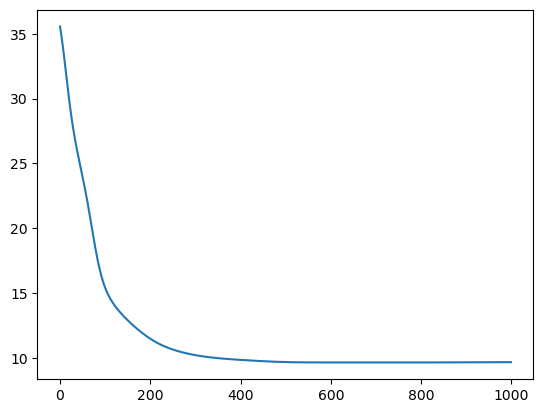

In [11]:
sns.lineplot(x = list(range(len(nn.test_loss))),
             y = nn.test_loss)

In [13]:
from collections import Counter
Counter(y_test)

Counter({1: 37, 0: 24})

In [22]:
y_preds = np.round(nn.forward(X_test_scaled))

In [23]:
len(y_test), len(y_preds)

(61, 61)

In [24]:
confusion_matrix(y_test, y_preds)

array([[20,  4],
       [ 8, 29]])